# Dataset

In [53]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#  Data Preparation

In [54]:
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 123, log_experiment = True, experiment_name = 'insurance_charges')

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


2022/11/02 07:57:48 INFO mlflow.tracking.fluent: Experiment with name 'insurance_charges' does not exist. Creating a new experiment.


In [55]:
# check transformed X_train
get_config('X_train')

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest
300,36.0,27.549999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
904,60.0,35.099998,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
670,30.0,31.570000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
617,49.0,25.600000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
373,26.0,32.900002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,37.0,22.705000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1147,20.0,31.920000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
106,19.0,28.400000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1041,18.0,23.084999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [56]:
# list columns of transformed X_train 
get_config('X_train').columns

Index(['age', 'bmi', 'sex_female', 'children_0', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_no',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

# Model Training & Selection

## Compare Models

In [85]:
# train all models using default hyperparameters
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2707.6623,23281021.7989,4805.2640,0.8345,0.4406,0.3127,0.0270
rf,Random Forest Regressor,2748.7705,25058324.2434,4990.5827,0.8199,0.4684,0.3308,0.0840
et,Extra Trees Regressor,2805.9612,28735821.1695,5333.4655,0.7972,0.4901,0.3356,0.0760
lightgbm,Light Gradient Boosting Machine,2959.5584,25236477.0456,5013.0892,0.8171,0.5427,0.3685,0.3040
dt,Decision Tree Regressor,3200.5848,44354336.7495,6621.0931,0.6778,0.5308,0.3523,0.0060
xgboost,Extreme Gradient Boosting,3302.3215,31739266.6000,5615.5941,0.7701,0.5661,0.4218,0.3580
huber,Huber Regressor,3536.2934,48321112.1841,6927.7220,0.6599,0.5240,0.2358,0.0140
ada,AdaBoost Regressor,4162.2323,28328260.0955,5316.6146,0.7985,0.6349,0.7263,0.0090
llar,Lasso Least Angle Regression,4315.7904,38355974.4786,6173.8737,0.7311,0.6105,0.4415,0.0070
lasso,Lasso Regression,4323.0733,38375206.8000,6175.3854,0.7308,0.6140,0.4431,0.0060


In [58]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [59]:
type(best)

sklearn.ensemble._gb.GradientBoostingRegressor

## Create Model

In [60]:
# train individual model
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2862.7040,32594527.6962,5709.1617,0.8053,0.5001,0.3189
1,3213.4800,46766697.5226,6838.6181,0.7281,0.5483,0.3138
2,3358.0912,47276424.0005,6875.7853,0.4014,0.6403,0.4507
3,2598.4977,33324847.6468,5772.7678,0.7217,0.4949,0.2977
4,4257.3907,67586324.3678,8221.0902,0.4973,0.7013,0.6052
5,3525.8700,44405489.2005,6663.7444,0.7144,0.4926,0.3367
6,2926.8113,44171238.0392,6646.1446,0.6994,0.3859,0.2262
7,2649.0367,33512969.9264,5789.0388,0.8157,0.4710,0.1812
8,3111.4079,43406571.9269,6588.3664,0.7196,0.5288,0.4670


In [61]:
print(dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


## Tune Hyperparameters

In [62]:
# tune hyperparameters of model
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1710.0867,18253568.8962,4272.4196,0.8910,0.3435,0.1349
1,2342.9618,33002910.7856,5744.8160,0.8081,0.4462,0.1421
2,1992.6884,23279759.5944,4824.9103,0.7053,0.4672,0.1580
3,2250.2711,25594847.8750,5059.1351,0.7863,0.4246,0.2126
4,2157.4516,24978154.4390,4997.8150,0.8142,0.4363,0.1531
5,1991.3288,18794342.2788,4335.2442,0.8791,0.3399,0.1565
6,1688.3935,20093049.8225,4482.5272,0.8633,0.3137,0.1210
7,2060.8145,26178263.6299,5116.4698,0.8561,0.4613,0.1332
8,2088.2260,23545921.7229,4852.4140,0.8479,0.3741,0.1592


In [63]:
print(tuned_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


## Ensemble Model

In [64]:
bagged_tunned_dt = ensemble_model(tuned_dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1781.9870,18856030.7390,4342.3531,0.8874,0.3483,0.1375
1,2303.1270,30657636.0353,5536.9338,0.8217,0.4244,0.1542
2,1918.4113,20226191.0312,4497.3538,0.7439,0.4364,0.1690
3,2168.5159,22079911.4542,4698.9266,0.8156,0.3861,0.1972
4,2178.9267,25827166.3913,5082.0435,0.8079,0.4457,0.1609
5,2159.8914,18453283.5408,4295.7285,0.8813,0.3327,0.1568
6,1720.5825,19389074.2974,4403.3027,0.8681,0.3277,0.1350
7,2078.0422,24175300.5136,4916.8385,0.8671,0.4205,0.1370
8,2000.4366,20900718.8771,4571.7304,0.8650,0.3661,0.1729


In [65]:
print(bagged_tunned_dt)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mae',
                                                      max_depth=6,
                                                      max_features=1.0,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.002,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=5,
                                                      min_samples_split=5,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=123,
                                                      splitter='best'),
                 bootstrap=True

## Voting Ensemble

In [66]:
dt = create_model('dt', verbose=False)
lasso = create_model('lasso', verbose=False)
knn = create_model('knn', verbose=False)
blender = blend_models([dt,lasso,knn])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4254.7559,39288469.2992,6268.0515,0.7653,0.5396,0.5098
1,4549.3479,47410273.6236,6885.5119,0.7243,0.5491,0.4460
2,3669.0044,30960225.7627,5564.1914,0.6080,0.6144,0.5503
3,4057.8722,33086477.5282,5752.0846,0.7237,0.6040,0.6271
4,4866.2846,49027087.1761,7001.9345,0.6354,0.6001,0.5892
5,4085.1702,38313908.9015,6189.8230,0.7535,0.4622,0.3828
6,4026.8154,43261276.1451,6577.3305,0.7056,0.4937,0.4382
7,3990.9586,37547476.1620,6127.5995,0.7935,0.4378,0.3313
8,4554.1222,44496306.0502,6670.5552,0.7126,0.5864,0.6296


In [67]:
print(blender)

VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=123,
                                                   splitter='best')),
                            ('la

In [68]:
type(blender)

sklearn.ensemble._voting.VotingRegressor

## Stacking Ensemble

In [69]:
stacker = stack_models([dt,lasso,knn])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3165.0113,24723403.8389,4972.2635,0.8523,0.4387,0.3427
1,3625.8737,34925542.2045,5909.7836,0.7969,0.5153,0.3473
2,3406.7556,30695308.4254,5540.3347,0.6114,0.5632,0.3921
3,3000.8234,21688745.4983,4657.1177,0.8189,0.5099,0.3880
4,4062.0086,38361371.5357,6193.6557,0.7147,0.5509,0.4372
5,3517.6638,28104255.1284,5301.3447,0.8192,0.5062,0.3537
6,3413.0976,31959140.2846,5653.2416,0.7825,0.4081,0.3213
7,3851.4117,33454716.5162,5784.0052,0.8160,0.4769,0.2989
8,3806.6041,28325532.6240,5322.1737,0.8170,0.5269,0.4635


In [70]:
print(stacker)

StackingRegressor(cv=5,
                  estimators=[('dt',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=123,
                                                    

# Analyze Model

In [71]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

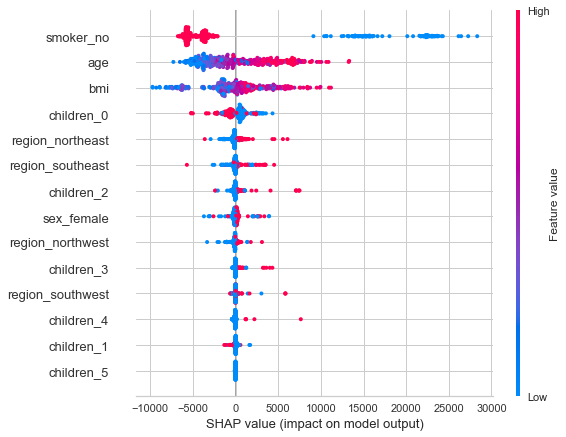

In [72]:
interpret_model(dt)

In [73]:
interpret_model(dt, plot = 'reason', observation=1)

# Model Predictions

In [74]:
# predict on holdout / test set
pred_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2383.1532,17287398.2703,4157.8117,0.8790,0.3984,0.2919


In [75]:
pred_holdout.head()

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,49.0,42.680000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9800.888672,10621.483595
1,32.0,37.334999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4667.607422,7290.151941
2,27.0,31.400000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34838.871094,36012.959871
3,35.0,24.129999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5125.215820,7553.788882
4,60.0,25.740000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12142.578125,14904.032497


In [76]:
# predict on new data
data2 = data.copy()
data2.drop('charges', axis=1, inplace=True)
data2.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [77]:
# finalize model
best_final = finalize_model(best)

In [78]:
# predict on data2
predictions = predict_model(best_final, data=data2)
predictions.head()

,age,sex,bmi,children,smoker,region,Label
0,19,female,27.900,0,yes,southwest,18894.260073
1,18,male,33.770,1,no,southeast,3698.287534
2,28,male,33.000,3,no,southeast,6029.271578
3,33,male,22.705,0,no,northwest,8958.189116
4,32,male,28.880,0,no,northwest,3900.039002


#  Save / Load / Deploy Model

In [79]:
save_model(best_final, 'insurance-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

In [80]:
# loaded_pipeline = load_model('insurance-pipeline')

In [81]:
# print(loaded_pipeline)

In [82]:
# # deploy model on AWS S3
# deploy_model(best_final, 'insurance-pipeline-aws', platform = 'aws',
#              authentication = {'bucket' : 'pycaret-test'})

## THE END

In [83]:
!mlflow ui

^C
